<a href="https://colab.research.google.com/github/leejineun/ai-class/blob/main/4_Keras_CNN_%EC%88%98%EC%97%85%EC%9A%A9(1%EA%B5%90%EC%8B%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

### 1. 합성곱은 왜 쓰나?
- 기존의 Fully-connected Layer의 경우, 이미지의 공간적 구조가 소실되는 단점이 있음 -> 가까운 거리 픽셀들끼리의 연관성 파악 안됨
- 합성곱층에서는 공간적 구조 유지 가능

### 용어 정리

**합성곱층**

- 합성곱 연산을 통해서 이미지 특징을 추출
- 수용영역에만 연결되기 때문에, 저수준 특성에서 고수준 특성으로 조합해 나감

**채널**
- 이미지는 (Height, Width, Channel)인 3차원로 텐서
- 흑백사진은 1 Channel, 컬러사진은 3 Channel

``Gray (32, 32, 1)``
``Color (32, 32, 3)``

**필터(커널)**
- 합성곱층에서의 가중치 파라미터
- 홀수 크기의 필터를 주로 사용 (짝수 크기 사용시 패딩이 비대칭이 된다)
- 주로 3x3, 5x5 사용

**패딩**
- 모서리 학습 및 이미지 크기를 유지하기 위해 입력 데이터 주변을 특정값으로 채우는 것
- 주로 0으로 채움

**스트라이드**
- 합성곱 연산시 필터의 이동 간격

**풀링 레이어**
- 합성곱층의 출력데이터를 받아, 크기를 줄이거나 특정 데이터를 강조
- Max Pooling, Avg Pooling, Min Pooling 존재
- 가로, 세로만 줄어들고 채널 수는 유지한다
- 파라미터를 줄여, 오버피팅 억제
- 리소스 절약 / 속도 이점



In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import cv2
import urllib
import numpy as np

In [2]:
def url_to_image(url, gray=False) : 
    res = urllib.request.urlopen(url)
    image = np.asarray(bytearray(res.read()), dtype='uint8')

    if gray : 
        image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
        return image
    else : 
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image

shape :  (512, 512, 3)


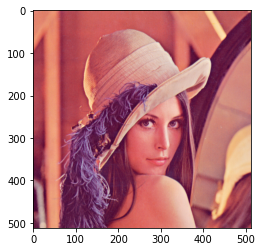

In [3]:
img_url = 'https://upload.wikimedia.org/wikipedia/ko/2/24/Lenna.png'
image = url_to_image(img_url)
print('shape : ', image.shape)

plt.imshow(image)
plt.show()

In [4]:
def image_grid(args, output) : 
    width = args[0]
    height = args[1]
    rows = args[2]
    cols = args[3]

    axes=[]

    fig = plt.figure()
    fig.set_size_inches((20, 14))

    for i in range(rows*cols) : 
        img = output[0, ..., i]
        axes.append(fig.add_subplot(rows, cols, i+1))
        plt.imshow(img)

    fig.tight_layout()
    plt.show()

In [5]:
image = np.expand_dims(image, axis=0)
image = image.astype('float32')

In [10]:
image.shape

(1, 512, 512, 3)

In [7]:
output_1 = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(512, 512, 3))(image)

In [8]:
output_1

<tf.Tensor: shape=(1, 512, 512, 32), dtype=float32, numpy=
array([[[[0.0000000e+00, 4.3731856e+00, 2.1240009e+01, ...,
          0.0000000e+00, 0.0000000e+00, 1.6953979e+01],
         [0.0000000e+00, 2.7941092e+01, 6.8740578e+01, ...,
          0.0000000e+00, 0.0000000e+00, 7.2424881e-02],
         [0.0000000e+00, 2.9592628e+01, 6.9048706e+01, ...,
          0.0000000e+00, 0.0000000e+00, 5.0383806e-03],
         ...,
         [0.0000000e+00, 3.1419228e+01, 6.5461227e+01, ...,
          0.0000000e+00, 0.0000000e+00, 2.2424290e+00],
         [0.0000000e+00, 3.1423347e+01, 6.2039139e+01, ...,
          0.0000000e+00, 0.0000000e+00, 7.7529540e+00],
         [0.0000000e+00, 3.0495483e+01, 6.4587112e+01, ...,
          1.3125584e+01, 0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 4.5269070e+01, ...,
          0.0000000e+00, 0.0000000e+00, 8.3888641e+01],
         [0.0000000e+00, 0.0000000e+00, 9.2817993e+01, ...,
          0.0000000e+00, 0.0000000e+00, 6.0740410e+01

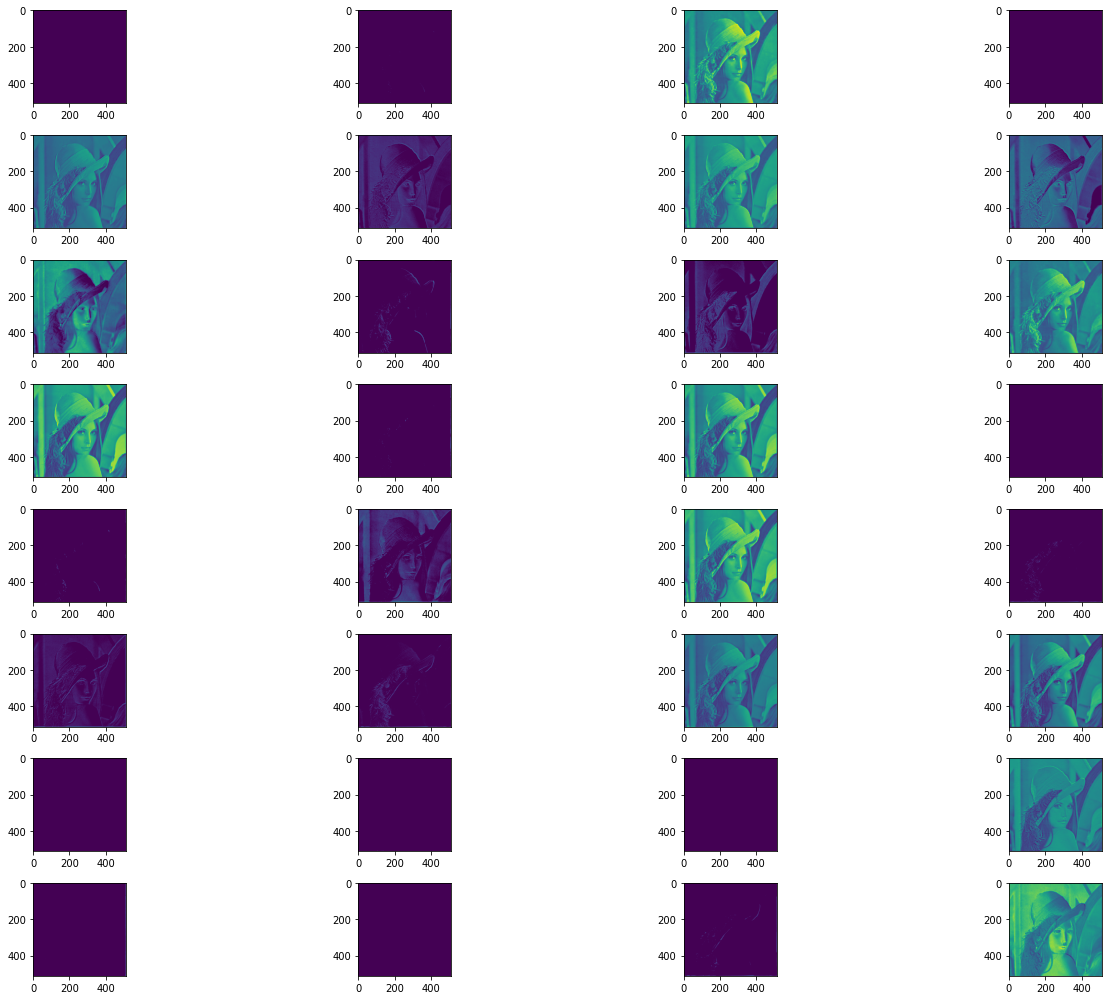

In [11]:
image_grid([100, 100, 8, 4], output_1)

In [12]:
output_pool = MaxPool2D()(output_1)

In [13]:
output_pool.shape

TensorShape([1, 256, 256, 32])

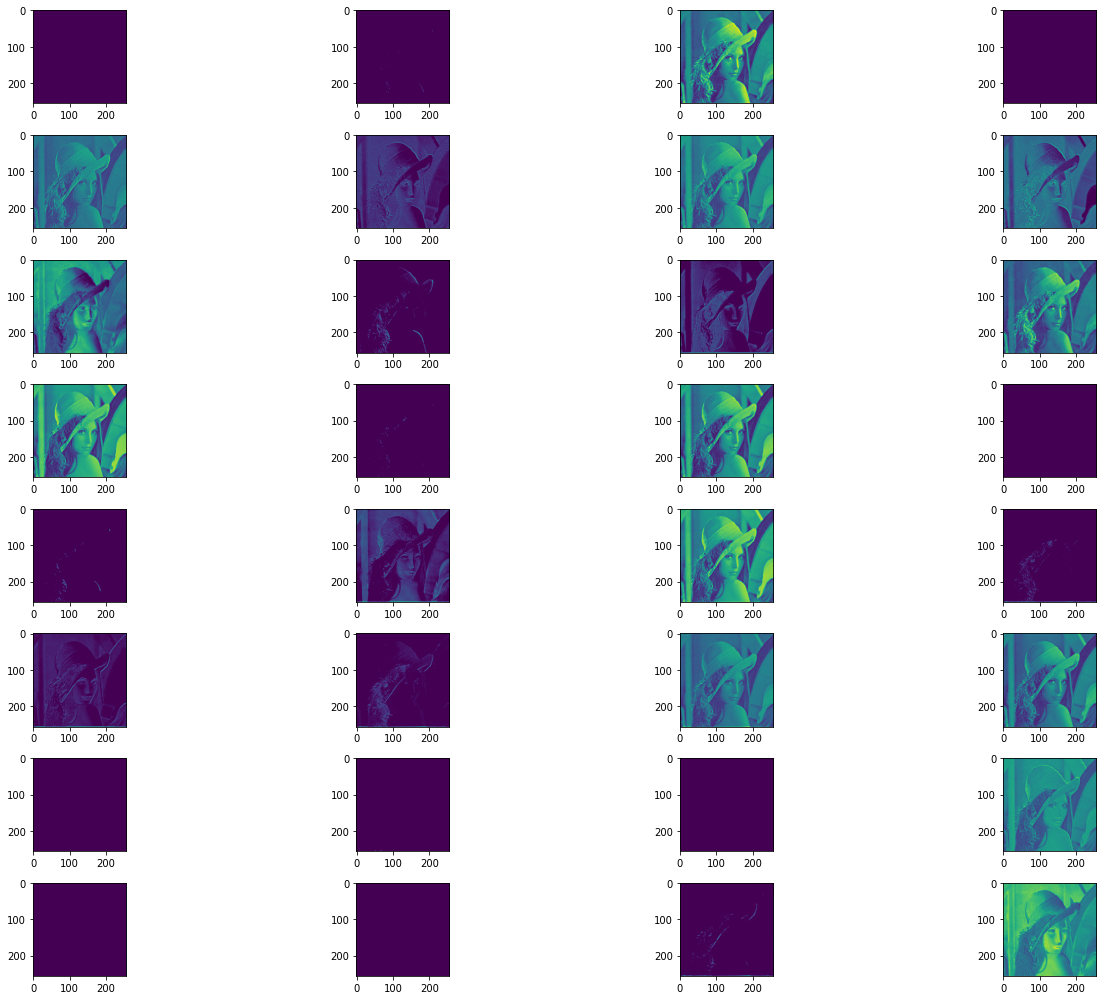

In [14]:
image_grid([100, 100, 8, 4], output_pool)

In [15]:
# 필터 = 64, 커널 사이즈= 3, 패딩 = same, activation=relu, input_shape=?, 입력 이미지 output_pool
output_2 = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=output_pool[1:])(output_pool)
output_2.shape

TensorShape([1, 256, 256, 64])

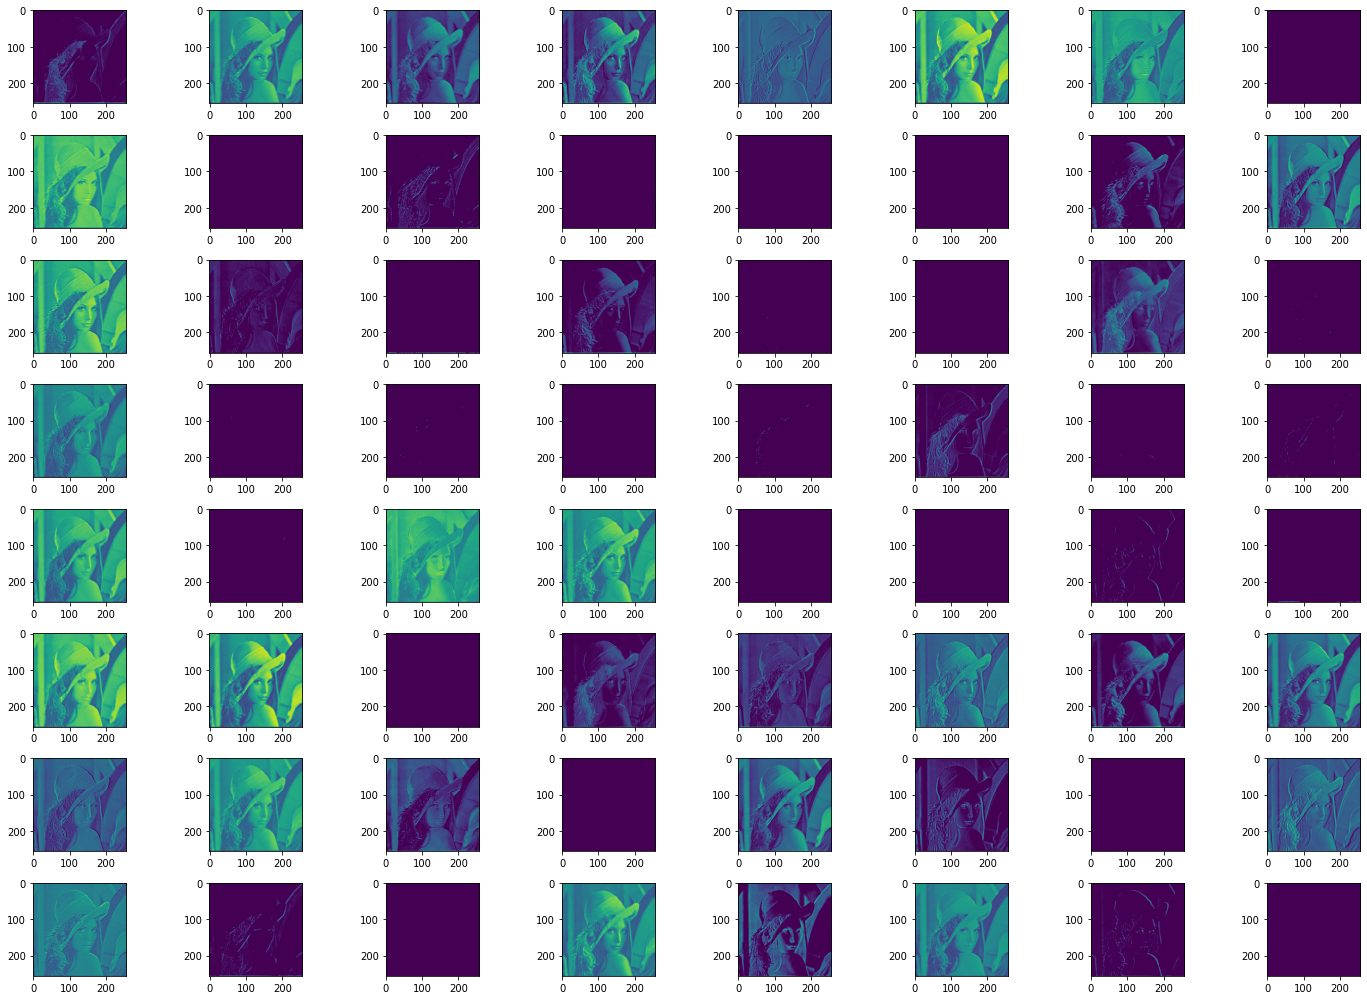

In [17]:
image_grid([100, 100, 8, 8], output_2)

In [18]:
# 맥스 풀링층을 만들어보세요
output_pool_2 = MaxPool2D()(output_2)
output_pool_2.shape

TensorShape([1, 128, 128, 64])

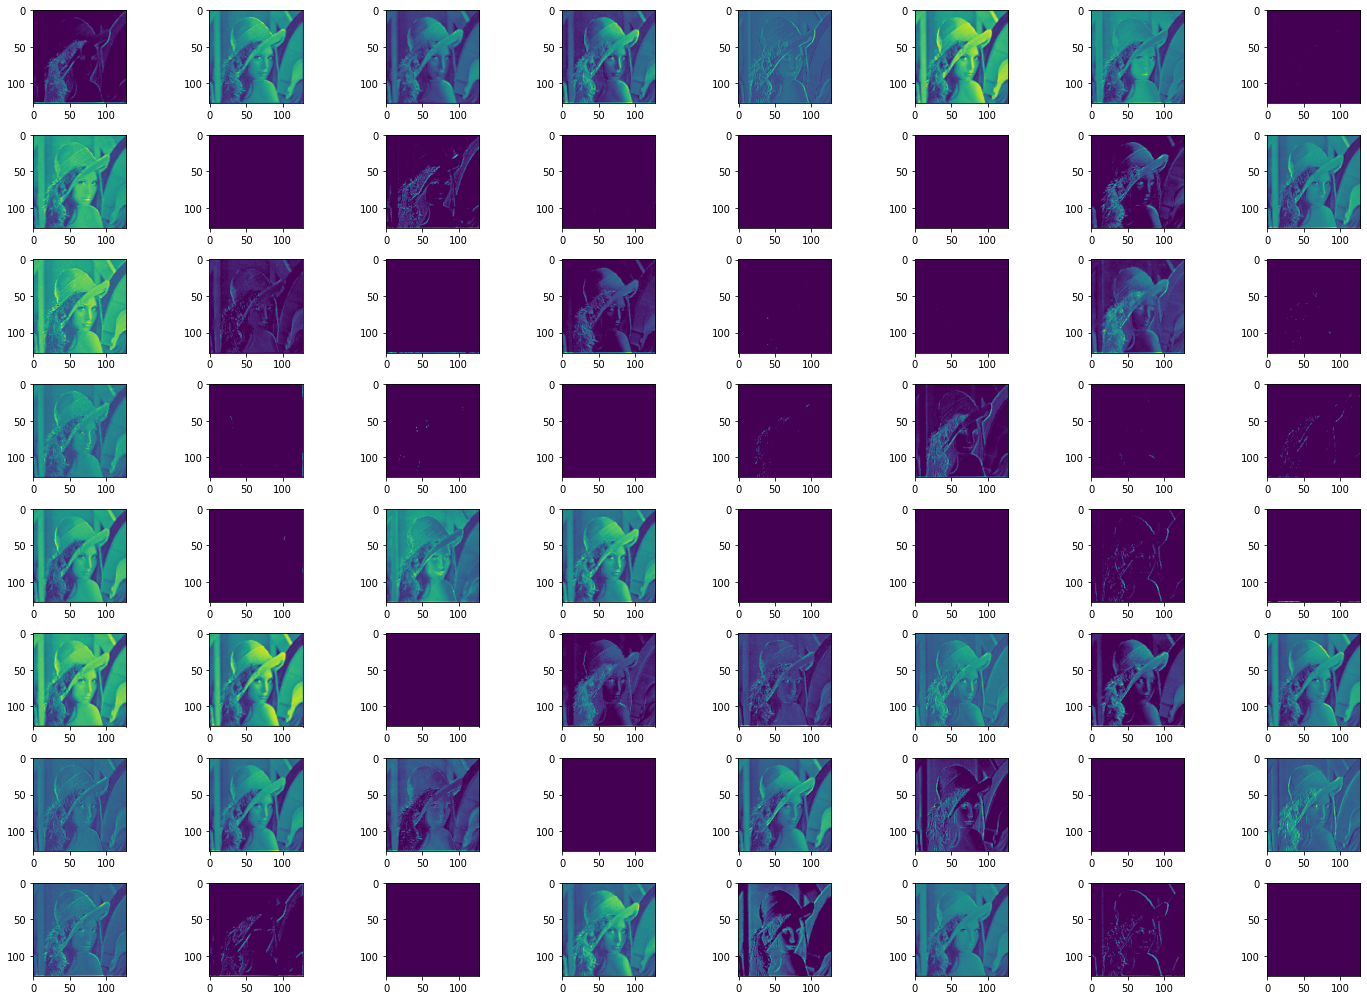

In [19]:
image_grid([100, 100, 8, 8], output_pool_2)

### 출력 사이즈 계산
**출력 사이즈**

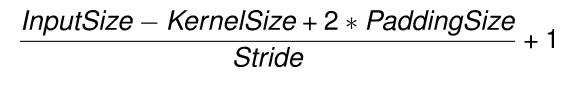


**패딩사이즈**


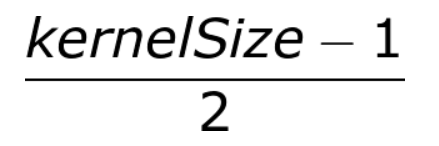

- 필터의 사이즈가 k이면, k/2만큼의 패딩을 준다

### 모델 구현해보기

### Fasion Mnist

- tensorflow datasets에는 다음과 같이 데이터가 있다.
    - boston_housing
    - cifar10
    - cifar100
    - fashion_mnist
    - imdb
    - mnist
    - reuters

Fasion Mnist 
- 0 : T-shirt/top
- 1 : Trouser
- 2 : Pullover
- 3 : Dress
- 4 : Coat
- 5 : Sandal
- 6 : Shirt
- 7 : Sneaker
- 8 : Bag
- 9 : Ankel boot
로 구성된 데이터 셋

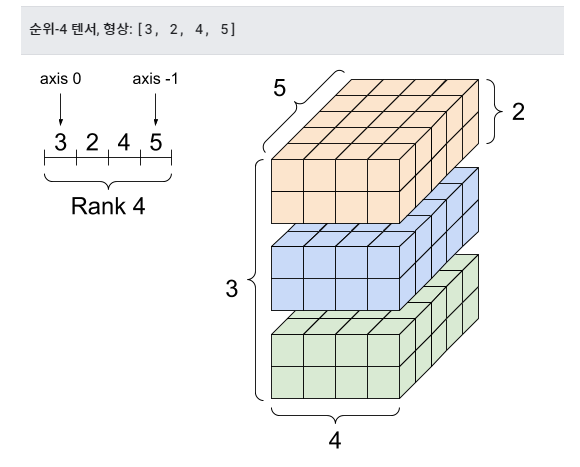

<출처 : https://www.tensorflow.org/guide/tensor?hl=ko>

### Confusion Matrix
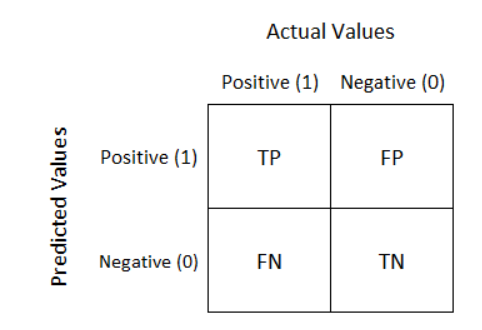

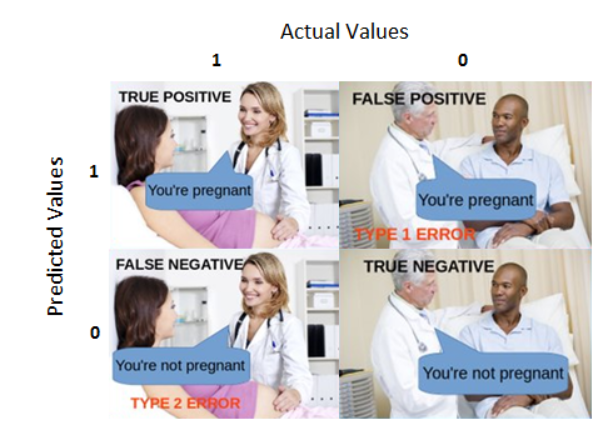

<출처 : https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62>

### 정확도
- 모든 예측 중 모델이 맞춘 비율 (TP + TN / TP + TN + FP + FN)
- 비대칭 클래스에서는 문제가 생김

### 정밀도
- 모델이 True라고 분류한 것 중 실제 True의 비율 (TP / TP + FP)

### 재현율
- 실제 True 중 모델이 True라고 분류한 비율 (TP / TP + FN)

### f-1 score
- 정밀도와 재현율의 조화평균

### 어떤 지표를 우선적으로 사용할까?
- 암환자 진단처럼 가짜 음성률을 줄여야 하는 경우는 **재현율**
- 유죄를 선고받으면 무조건 사형을 당하는 상황에서 잘못된 유죄 선고(False Positive)를 줄여야 하는 경우는 **정밀도**
- 적당한 지점 : f1 score
